# Assignment 4 - Unsupervised Learning and More Supervised Learning

## Nathan Inkawhich
Netid:  nai2

## 1

### [30 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of algorithms on uniquely challenging clustering datasets. 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them your choice of 4 of the 8 interesting datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performnace of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- flame.txt
- jain.txt
- pathbased.txt
- R15.txt
- spiral.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

**(A)**

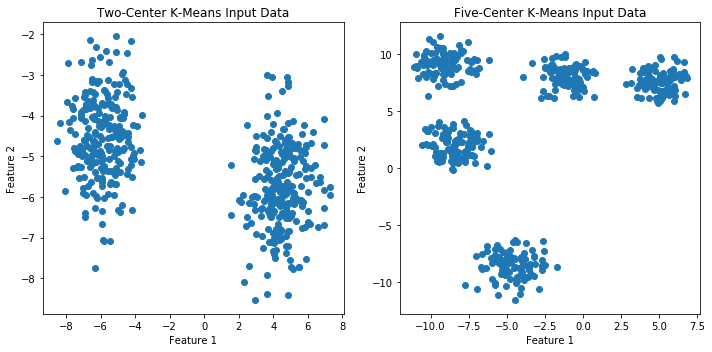

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random
import math

###############################################
# (A) - Implement K-Means
###############################################

def L2_distance(x1,x2):
    return np.linalg.norm(x1-x2)

def fit_k_means(data, K, max_iters):
    
    # Extract number of features
    num_features = data.shape[1]
    
    # Randomly initialize means
    #means = np.random.randint(data.min(), high=data.max(), size=(K,num_features), dtype='int')
    means = np.zeros((K,num_features))
    random_indexes = random.sample(range(0, len(data)-1), K)
    for i,ind in enumerate(random_indexes):
        means[i] = data[ind]
    
    # For logging the cost at every iteration
    cost_arr = []
    
    iters = 0
    # Repeat until convergence
    while(iters < max_iters):
        
        # For keeping track of each cluster's size as we assign data points to clusters
        cluster_sizes = np.zeros(K)
        # For keeping track of which data is in the cluster. We will keep a running sum of
        #  the data here, then at the end we will divide by the number of examples in the 
        #  cluster to get the new centroid.
        cluster_sums = np.zeros(shape=means.shape)

        cost = 0
        # For each observation in the dataset
        for i,obs in enumerate(data):
            # Seed the closest mean as the first one
            closest_dist = L2_distance(obs, means[0])
            closest_mean = 0
            # Check the other means to see if they are closer to this data point
            for k in range(1,len(means)):
                # Calculate the distance between the given observation and this mean
                tmp_dist = L2_distance(obs,means[k])
                # Check if we have found a new closest mean
                if tmp_dist < closest_dist:
                    # Update new best mean info
                    closest_mean = k
                    closest_dist = tmp_dist
            # Once we have finished, we have found the closest mean to this observation
            # Lets update our stats
            cluster_sizes[closest_mean] += 1
            cluster_sums[closest_mean] += obs
            cost += closest_dist**2
            
        # This concludes one iteration of adjusting the means, lets recompute the
        #  centroids and check for convergence
        new_means = np.zeros(shape=means.shape)
        for z in range(len(means)):
            new_means[z] = cluster_sums[z]/float(cluster_sizes[z])
        #print "\nNew Means: \n",new_means
        #print "Cost: ",cost
        # check for convergence
        cost_arr.append(cost)
        if len(cost_arr) > 2 and (cost == cost_arr[-2]):
            #print "Converged To Cost: {}, Means: \n{}".format(cost,means)
            break
            
        # Update the means for next iter
        means = np.copy(new_means)
        
        iters += 1
    
    return means,cost_arr

# Generate Cluster Datasets
blobs_data_2center = make_blobs(n_samples=500, n_features=2, centers=2)[0]
blobs_data_5center = make_blobs(n_samples=500, n_features=2, centers=5)[0]

# Plot data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Two-Center K-Means Input Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in blobs_data_2center], [x[1] for x in blobs_data_2center])
plt.subplot(1,2,2)
plt.title("Five-Center K-Means Input Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in blobs_data_5center], [x[1] for x in blobs_data_5center])
plt.tight_layout()
plt.show()


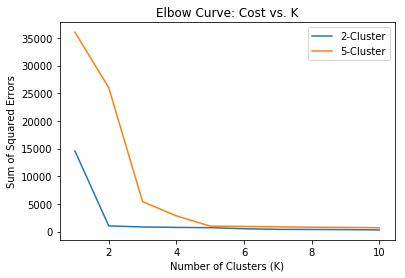

In [5]:
MAX_ITERS = 50

C2 = []
C5 = []
# Run the 2 cluster tests
for K in range(1,11):
    _,cost_arr2 = fit_k_means(blobs_data_2center, K, MAX_ITERS)
    _,cost_arr5 = fit_k_means(blobs_data_5center, K, MAX_ITERS)
    C2.append(cost_arr2[-1])
    C5.append(cost_arr5[-1])

plt.plot(range(1,11),C2,label="2-Cluster")
plt.plot(range(1,11),C5,label="5-Cluster")
plt.title("Elbow Curve: Cost vs. K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors")
plt.legend()
plt.show()


**(a)**

*Note: Due to the random seeding of the cluster centers, this plot will not look the same every time.*

From the above elbow curves, we see that for the 2-Cluster dataset the elbow in the blue curve is very distinctly at $K=2.$ From the above plot of the two cluster data, there is clearly two clusters, so intuitively we would expect that a two cluster k-means algorithm would be a suitable fit. We would also expect that a one cluster algorithm would not be sufficient to model the data, and any *K* bigger than 2 would overfit the data and would not properly represent the true relationship by over-partitioning the feature space.

From the plot of the 5-cluster dataset, we see that there are in-fact 5 distinct blobs, but three of the blobs are somewhat close to eachother. For this reason, we may expect the elbow to be in the range of $K=3$ to $K=5.$ From the above plot this observaion is confirmed as there is some kind of an elbow at $K=3$ but the true elbow comes at $K=5,$ when the error has nearly converged. Intuitively, we can also reason that when $K<3$ the model would not be capable of representing the true structure of the data, and the error would be very high. For $K>5,$ the model would not accurately represent the true relationship of the data even though the error is low because there would be some overfit.

**(b)** 

**K-means**

K-means is a *simple* clustering algorithm that assumes the clusters have similar distributions, and ultimately divides the feature space into Voronoi cells. The algorithm randomly seeds cluster centers, assigns observations to the nearest cluster, updates the clusters to be the centroids of the data assigned to each, then repeats until convergence.

** Agglomerative**

Agglomerative clustering is a bottom-up hierarchial technique that works to build a dendrogram of the observations according to a similarity metric. The algorithm starts by setting each observation to its own cluster, then greedily groups the most similar clusters until there is only one cluster remaining, at which point the user can choose a dissimilarity threshold to create any number of resulting clusters. 

**Gaussian Mixture Models**

GMMs are a distribution based clustering technique that assumes the clusters are each from a Gaussian distribution, and works well when there is variation in cluster variance and correlation between features, as well as when the clusters have equal variance. The idea of GMMs is to perform *Expectation Maximization* to maximize the log likelihood of the data given the model parameters, and accomplishes this using latent variables.

**DBSCAN**

DBSCAN is a density based clustering technique that can find arbitrarily shaped clusters, *is robust to outliers*, but cannot handle significant variation in cluster density. The algorithm works to classify each point as a core point, border point, or outlier point based on the number of nearby points, then groups neighboring core and border points to form the clusters. 

**Spectral**

Spectral clustering focuses on connectedness rather than compactness. The algorithm constructs an affinity matrix based on individual differences between observations then extracts the principal components of this matrix and uses a simpler clustering method (i.e. k-means) to cluster the data in this lower dimensional space. 

**(c)** 

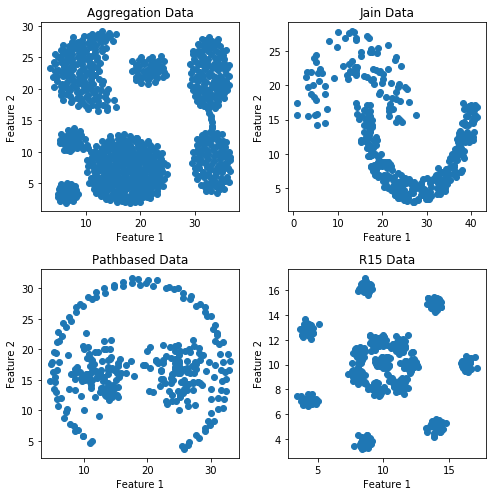

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def parse_dataset(fname):
    data = []
    f = open(fname,'r')
    for line in f:
        l = line.split()
        data.append( [float(l[0]), float(l[1])] )
    return data

##### Parse in data
# Aggregation Data
aggregation_data = parse_dataset('./data/Aggregation.txt')
# Jain Data
jain_data = parse_dataset('./data/jain.txt')
# Pathbased Data
pathbased_data = parse_dataset('./data/pathbased.txt')
# R15 Data
r15_data = parse_dataset('./data/R15.txt')

#### Plot the data
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.title("Aggregation Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data])

plt.subplot(2,2,2)
plt.title("Jain Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data])

plt.subplot(2,2,3)
plt.title("Pathbased Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data])

plt.subplot(2,2,4)
plt.title("R15 Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data])

plt.tight_layout()
plt.show()

Above is a plot of the four datasets that will be used in section **C**. Each dataset presents a unique challenge such as various cluster densities, shapes, and inter cluster distances.

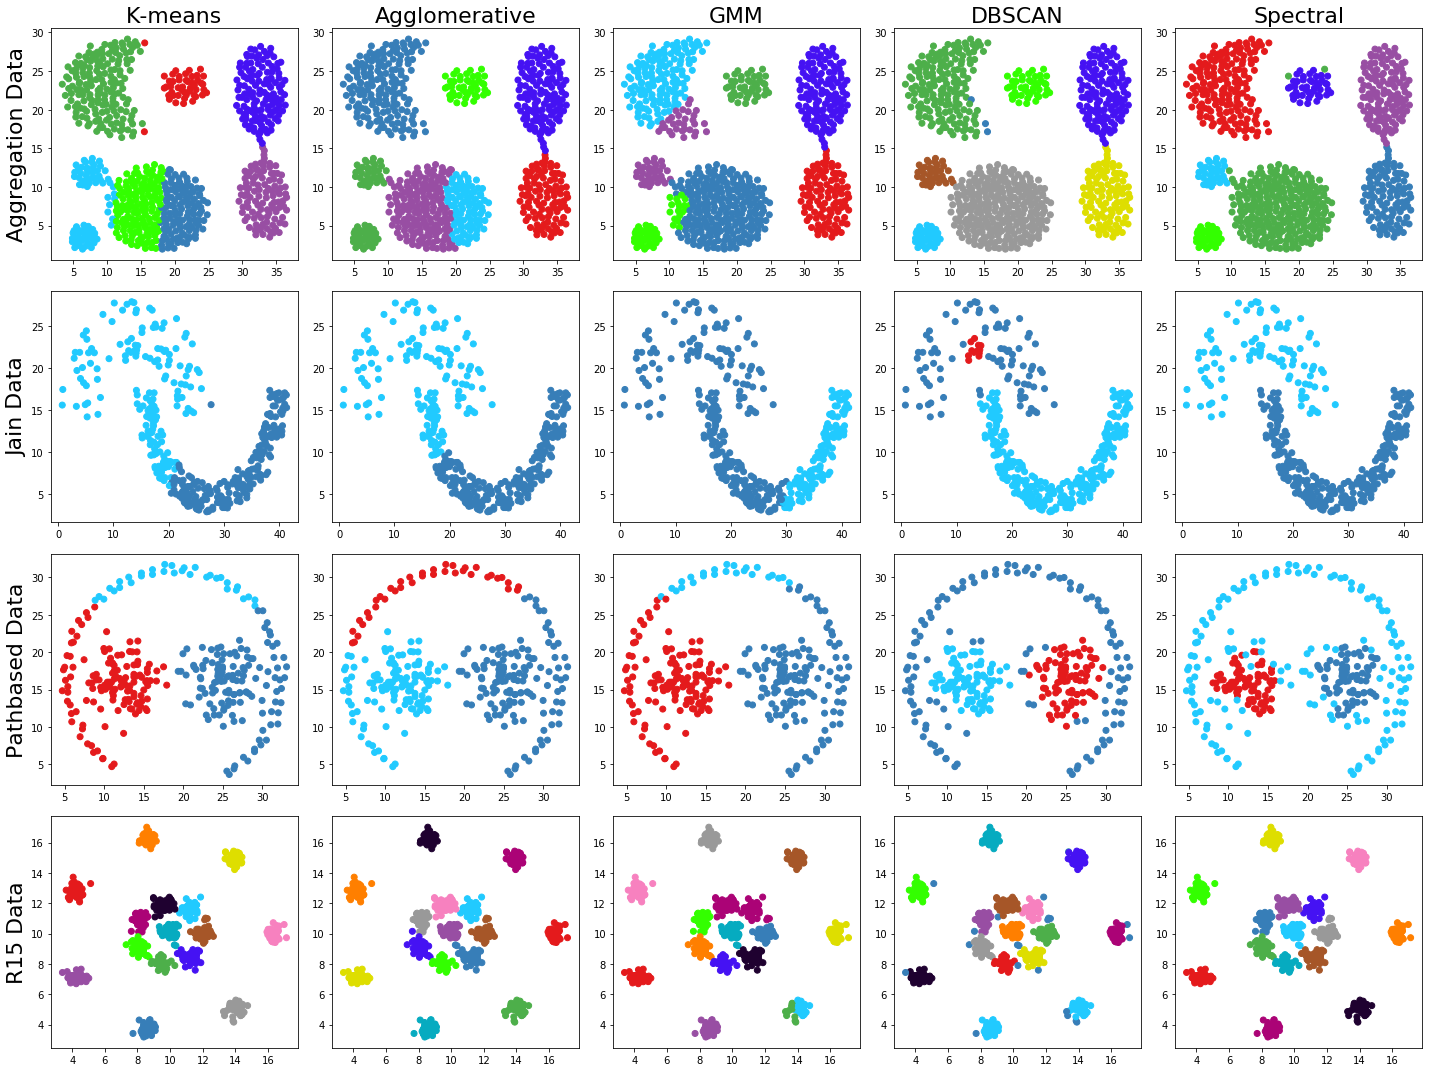

In [70]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from matplotlib.colors import ListedColormap

colors = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00', '#ab0376', '#4512f3', '#06abc0', '#33ff00', '#1f0130','#21caff'])

#######################################
# Aggregation Data
#######################################
# Kmeans
aggregation_kmeans = KMeans(n_clusters=7, random_state=0).fit_predict(aggregation_data)
# Agglomerative
aggregation_agglomerative = AgglomerativeClustering(n_clusters=7).fit_predict(aggregation_data)
# GMM
aggregation_gmm_model = GaussianMixture(n_components=7).fit(aggregation_data)
aggregation_gmm = aggregation_gmm_model.predict(aggregation_data)
# DBSCAN
aggregation_dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean').fit_predict(aggregation_data)
# Spectral
aggregation_spectral = SpectralClustering(n_clusters=7, eigen_solver=None, random_state=None, n_init=10).fit_predict(aggregation_data)

# Plot Aggregation Results
plt.figure(figsize=(20,15))

#plt.suptitle("Aggregation Results")
plt.subplot(4,5,1)
plt.title("K-means",fontsize=22)
plt.ylabel("Aggregation Data",fontsize=22)
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data],c=aggregation_kmeans,cmap=colors)
plt.subplot(4,5,2)
plt.title("Agglomerative",fontsize=22)
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data],c=aggregation_agglomerative,cmap=colors)
plt.subplot(4,5,3)
plt.title("GMM",fontsize=22)
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data],c=aggregation_gmm,cmap=colors)
plt.subplot(4,5,4)
plt.title("DBSCAN",fontsize=22)
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data],c=aggregation_dbscan,cmap=colors)
plt.subplot(4,5,5)
plt.title("Spectral",fontsize=22)
plt.scatter([x[0] for x in aggregation_data],[x[1] for x in aggregation_data],c=aggregation_spectral,cmap=colors)

#######################################
# Jain Data
#######################################
# Kmeans
jain_kmeans = KMeans(n_clusters=2).fit_predict(jain_data)
# Agglomerative
jain_agglomerative = AgglomerativeClustering(n_clusters=2).fit_predict(jain_data)
# GMM
jain_gmm_model = GaussianMixture(n_components=2).fit(jain_data)
jain_gmm = jain_gmm_model.predict(jain_data)
# DBSCAN
jain_dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean').fit_predict(jain_data)
# Spectral
jain_spectral = SpectralClustering(n_clusters=2, eigen_solver=None, random_state=None, n_init=10).fit_predict(jain_data)

# Plot Jain Results
#plt.suptitle("D31 Results")
plt.subplot(4,5,6)
plt.ylabel("Jain Data",fontsize=22)
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data],c=jain_kmeans,cmap=colors)
plt.subplot(4,5,7)
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data],c=jain_agglomerative,cmap=colors)
plt.subplot(4,5,8)
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data],c=jain_gmm,cmap=colors)
plt.subplot(4,5,9)
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data],c=jain_dbscan,cmap=colors)
plt.subplot(4,5,10)
plt.scatter([x[0] for x in jain_data],[x[1] for x in jain_data],c=jain_spectral,cmap=colors)

#######################################
# Pathbased Data
#######################################
# Kmeans
pathbased_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(pathbased_data)
# Agglomerative
pathbased_agglomerative = AgglomerativeClustering(n_clusters=3).fit_predict(pathbased_data)
# GMM
pathbased_gmm_model = GaussianMixture(n_components=3).fit(pathbased_data)
pathbased_gmm = pathbased_gmm_model.predict(pathbased_data)
# DBSCAN
pathbased_dbscan = DBSCAN(eps=1.61, min_samples=7, metric='euclidean').fit_predict(pathbased_data)
# Spectral
pathbased_spectral = SpectralClustering(n_clusters=3, eigen_solver=None, random_state=None, n_init=10).fit_predict(pathbased_data)

# Plot Pathbased Results
#plt.suptitle("Pathbased Results")
plt.subplot(4,5,11)
plt.ylabel("Pathbased Data",fontsize=22)
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data],c=pathbased_kmeans,cmap=colors)
plt.subplot(4,5,12)
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data],c=pathbased_agglomerative,cmap=colors)
plt.subplot(4,5,13)
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data],c=pathbased_gmm,cmap=colors)
plt.subplot(4,5,14)
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data],c=pathbased_dbscan,cmap=colors)
plt.subplot(4,5,15)
plt.scatter([x[0] for x in pathbased_data],[x[1] for x in pathbased_data],c=pathbased_spectral,cmap=colors)

#######################################
# R15 Data
#######################################
# Kmeans
r15_kmeans = KMeans(n_clusters=15, random_state=0).fit_predict(r15_data)
# Agglomerative
r15_agglomerative = AgglomerativeClustering(n_clusters=15).fit_predict(r15_data)
# GMM
r15_gmm_model = GaussianMixture(n_components=15).fit(r15_data)
r15_gmm = r15_gmm_model.predict(r15_data)
# DBSCAN
r15_dbscan = DBSCAN(eps=.41, min_samples=9, metric='euclidean').fit_predict(r15_data)
# Spectral
r15_spectral = SpectralClustering(n_clusters=15, n_init=20).fit_predict(r15_data)

# Plot R15 Results
#plt.suptitle("R15 Results")
plt.subplot(4,5,16)
plt.ylabel("R15 Data",fontsize=22)
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data],c=r15_kmeans,cmap=colors)
plt.subplot(4,5,17)
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data],c=r15_agglomerative,cmap=colors)
plt.subplot(4,5,18)
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data],c=r15_gmm,cmap=colors)
plt.subplot(4,5,19)
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data],c=r15_dbscan,cmap=colors)
plt.subplot(4,5,20)
plt.scatter([x[0] for x in r15_data],[x[1] for x in r15_data],c=r15_spectral,cmap=colors)

plt.tight_layout()
plt.show()

**(C)**

**Aggregation Dataset**

On the Aggregation dataset the K-means and Agglomerative performed the worst. This is because there is variation in cluster variance, there is some correlation between features, and not all of the clusters are well separated. The techniques that performed the best and created very reasonable clusters are DBSCAN and Spectral. This is largely due to DBSCAN's ability to find arbitrarily shaped clusters and the lack of assumptions made by the spectral clustering algorithm about shapes or distributions.

**Jain Dataset**

On the Jain dataset K-means, GMM, and Agglomerative all performed poorly. For K-means and GMM this is because the data is certainly not from a normal distribution and for Agglomerative this is due to not considering connectedness. Both DBSCAN and Spectral clustering did well, however Spectral performed ideal due to its ability to model connectedness. DBSCAN did not perform ideally because the top cluster appears to have a different density than the bottom cluster.

**Pathbased Dataset**

On the Pathbased dataset K-means, Agglomerative, and GMM all performed very similarly. The resulting clusters from these techniques are reasonable, but since none of the techniques prioritize connectedness they were not able to correctly cluster the circular cluster but they do a good job of the two inner clusters. DBSCAN performs the best on this dataset as it is able to mostly cluster the two inner clusters and does well on the circular cluster. This is due to DBSCAN's lack of assumptions about the shape of the clusters.

**R15 Dataset**

All of the methods do a reasonable job on the R15 dataset.  The approximate Gaussian distribution assumptions for each cluster mean that k-means and GMM do well. The clusters are separated enough that Agglomerative does a good job and both DBSCAN and Spectral are able to group the clusters equally as well.

## 2

### [15 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - a legend should be provided).

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available.*

**ANSWER**

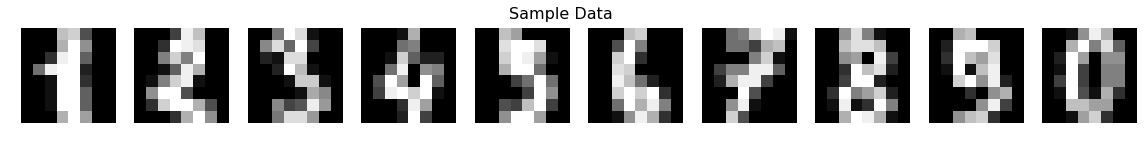

In [12]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#######################################
# (A)
#######################################

# Load the digits dataset
digits = load_digits(return_X_y=True)
data = digits[0]
labels = digits[1]

# Plot a sample of the data
plt.figure(figsize=(20,2))
plt.suptitle("Sample Data",fontsize=16)
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(data[i].reshape((8,8)),cmap='gray')
plt.show()

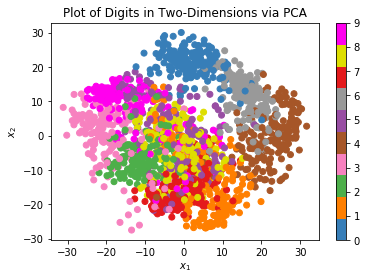

In [13]:
# Transform data with PCA to 2-Dimensions
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)

colors = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00', '#ff00ee'])

# Plot PCA Results
plt.title("Plot of Digits in Two-Dimensions via PCA")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in transformed_data],[x[1] for x in transformed_data],c=labels,cmap=colors)
plt.colorbar()
plt.show()

**(A)**

From the above plot, we see that representing the data with the two first principal components creates interesting structure in the data (that the colors make clear). Although there is significant overlap, the features of each digit occupy a somewhat localized space in the feature space. However, due to the severe overlap, we would not expect a traditional cluster algorithm to perform well on this data.

**(B)**

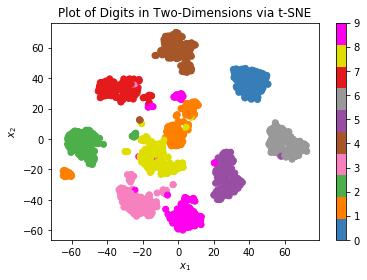

In [18]:
#######################################
# (B)
#######################################

# Transform data with t-SNE to 2-Dimensions
X_tsne = TSNE(n_components=2,perplexity=25,learning_rate=250).fit_transform(data)

plt.title("Plot of Digits in Two-Dimensions via t-SNE")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in X_tsne],[x[1] for x in X_tsne],c=labels,cmap=colors)
plt.colorbar()
plt.show()

As is immediately evident, t-SNE does a much better job that PCA at representing the data in two dimensions. There is only minor overlap of the features and it appears that a clustering algorithm would do a fair job at separating the classes in this space.

**(C)**

Before considering accuracy, one immediately evident factor is that the PCA decomposition is much faster than t-SNE. However, in this case the slower speed appears to be justified by the suprising performance of t-SNE. As mentioned above, because of the colors in the PCA plot, we can see that each class is somewhat localized to a region in the feature space, but there is significant overlap in the regions. For this reason it would be very difficult to run a clustering algorithm on the data and get reliable results. Also, if the colors were not shown on the plot it would be hard, even for a human, to make out the different classes in the data. In contrast, the t-SNE algorithm is able to create very distinct, hardly overlapping clusters of the data in two dimensional space. Although there is a price to pay in terms of speed, we would expect a clustering algorithm to do quite well on the data in this domain. 

The reason t-SNE performs better than PCA at clustering the data is because of the more complicated methods of transformation. It uses region specific non-linear transforms to probabilistically represent the data as opposed to PCA which uses covariances and eigenvectors to statistically find the direction of greatest variance, then project the data onto these axis.

## 3

### [25 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incoporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Choose a few values of $k$ that clearly show the difference in image reconstruction. Plot the original image, and 3 compressed versions with different levels of compression (i.e. using different numbers of principal components).

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

(A)


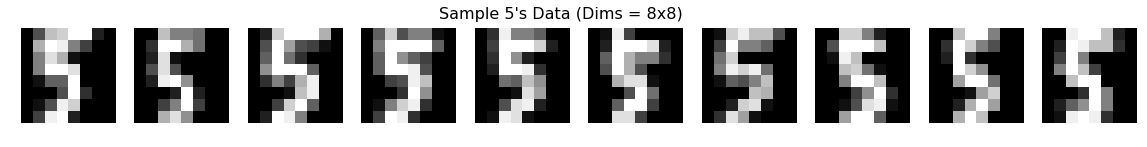

In [49]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the full digits dataset
digits = load_digits(return_X_y=True)
data = digits[0]
labels = digits[1]

# Extract only the fives from the dataset
fives_data = []
for i in range(len(labels)):
    if labels[i] == 5:
        fives_data.append(data[i])
        
# This is the fives dataset we want
fives_data = np.array(fives_data)

#######################################
# (A)
#######################################
print "(A)"
# Plot a sample of the data
plt.figure(figsize=(20,2))
plt.suptitle("Sample 5's Data (Dims = 8x8)",fontsize=16)
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(fives_data[i].reshape((8,8)),cmap='gray')
plt.show()

**(B)**

(B)


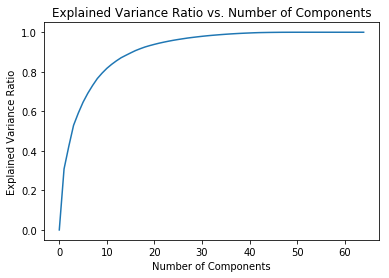

In [50]:
#######################################
# (B)
#######################################
# Explained Variance
explained_variance_list = []
for i in range(0,65):
    pca = PCA(n_components=i)
    pca.fit(fives_data)
    explained_variance_list.append(np.sum(pca.explained_variance_ratio_))

print "(B)"
plt.title("Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.plot(range(0,65),explained_variance_list)
plt.show()

From the above plot, we see that there is a clear relationship between the number of components included and the fraction of variance explained. First, as expected, when zero components are used, 0% of the variance is explained, and when all 64 components are included, 100% of the variance is explained. Also, the ratio increases very rapidly as we add the first few components, but the returns dwindle after the 30th component. This follows the intuition that most of the variance in the data is along a subset of the dimensions, and the rest of the dimensions do not contribute much.

**(C)**

(C)


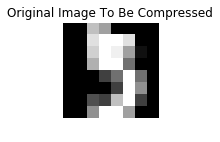

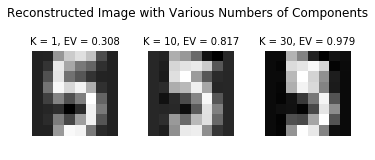

In [72]:
#######################################
# (C)
#######################################
print "(C)"
# Grab and image to compress
observation = fives_data[0]
observation = np.array(observation)
# Plot the image
plt.figure(figsize=(1.75,1.75))
plt.imshow(observation.reshape((8,8)),cmap='gray')
plt.title("Original Image To Be Compressed")
plt.axis("off")
plt.show()

plt.figure(figsize=(5,2.5))
plt.suptitle("Reconstructed Image with Various Numbers of Components")
for i,k in enumerate([1,10,30]):
    # Decompose the data with PCA
    pca = PCA(n_components=k)
    pca.fit(fives_data)
    # Grab explained variance ratio
    ev = pca.explained_variance_ratio_
    # Transform our observation into lower dimensional space (i.e. compress it)
    transformed_data = pca.transform([observation])
    # Perform inverse transform to reconstruct image
    inv = pca.inverse_transform(transformed_data)
    # Plot reconstruction
    plt.subplot(1,3,i+1)
    plt.axis("off")
    plt.title("K = {}, EV = {}".format(k,str(round(np.sum(ev),3))),fontsize=10)
    plt.imshow(inv.reshape(8,8),cmap='gray')
plt.tight_layout()
plt.show()

**(C)**

*K = number of components; EV = explained variance*

From the above figures we see that even at $K=1$, we (humans) can still make out that the number is a 5 but only 30% of the variance is explained. At $K=10$ the reconstruction is even more clear and over 81% of the variance is explained by those 10 principal components. Finally, at $K=30$ almost 98% of the variance has been explained. These three $K$ values show visually how the explained variance grows with the number of components used in PCA and goes along with the plot from **B.**

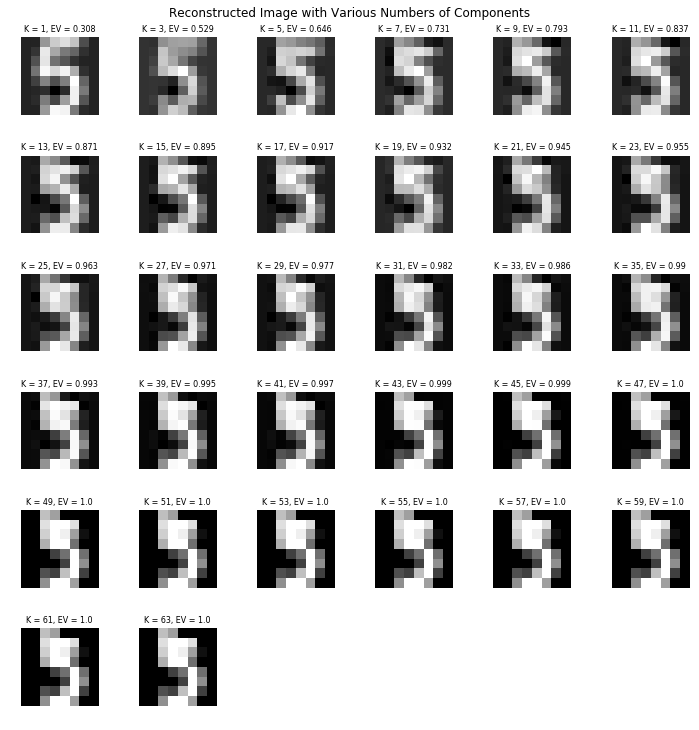

In [74]:
#######################################
# (D)
#######################################
plt.figure(figsize=(10,10))
plt.suptitle("Reconstructed Image with Various Numbers of Components",y=1.01)
for i,k in enumerate(range(1,64,2)):
    # Decompose the data with PCA
    pca = PCA(n_components=k)
    pca.fit(fives_data)
    # Grab explained variance ratio
    ev = pca.explained_variance_ratio_
    # Transform our observation into lower dimensional space (i.e. compress it)
    transformed_data = pca.transform([observation])
    # Perform inverse transform to reconstruct image
    inv = pca.inverse_transform(transformed_data)
    # Plot reconstruction
    plt.subplot(6,6,i+1)
    plt.axis("off")
    plt.title("K = {}, EV = {}".format(k,str(round(np.sum(ev),3))),fontsize=8)
    plt.imshow(inv.reshape(8,8),cmap='gray')
plt.tight_layout()
plt.show()

**(D)**

Although **C** gives us a good visual idea of the reconstruction performance, we can plot the reconstructions at regular intervals along with the explained variance as shown above. Subjectively, it appears that the reconstruction at $K=10$, when over 81% of the variance has been explained, is when the reconstructions start to become "good" and the approximations are reasonable. From the above plots, we also see that at $K=35$, 99% of variance is explained and the reconstruction is "very good." 

Another important way to view PCA is the amount of compression that is achieved. For this data the original dimensionality is 64, so when we reduce the dimensionality to 1 in the case of $K=1$ we have compressed the data to $1/64 * 100= 1.56\%$ of its original size. When $K=10,$ the data is $10/64 * 100= 15.6\%$ of its original size and at $K=30$ it is $30/64 * 100= 46.8\%$ of its original size. Obviously, there is a tradeoff that must be made when using PCA in terms of explained variance and compression, both of which relate to reconstruction error. Of the three aforementioned values of $K$ in **C**, $K=1$ may be too much reconstruction error, $K=10$ may be a good tradeoff between compression and error, and depending on error tolerance $K=30$ may also be a good tradeoff. Also, from the above plot, at $K=47,$ 100% of the variance has been explained meaning that we can essentially compress the data from 64 to 47 dimensions for *free.*

## 4

### [15 points] Build and test your own Neural Network

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Your network should have two input nodes, two hidden layers with five nodes each and one output node. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC.

**(c)** Suggest at least two ways in which you neural network could be improved.

**(d)** [5 extra credit bonus points] Adjust the parameters in your model in (b) and choose your parameters to improve performance.

**ANSWER**

In [97]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
from sklearn.metrics import roc_curve, auc

#######################################
# (A)
#######################################

def accuracy(l1, l2):
    assert(len(l1) == len(l2))
    ans = l1 - l2
    return 1-np.count_nonzero(ans)/float(len(l1))

class NN(object):
    def __init__(self,layer_config):
        self.layers = layer_config
        self.num_layers= len(layer_config)
        self.weights = []
        self.biases = []
        # Randomly initialize the weights of the network
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(self.layers[i], self.layers[i+1])+1)
        # Randomly initialize the biases of the network
        for i in range(1,self.num_layers):
            self.biases.append(np.random.randn(self.layers[i], 1))
    
    # Sigmoid function
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # Derivative of Sigmoid Function
    def sigmoid_prime(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    # Derivative of Cost w.r.t output activation
    def dC_daL(self, a, y):
        return (a-y)        
            
    def fit(self, train_data, train_labels, lr=.9, epochs=100):
        
        # How many times we want to cycle through the entire training data
        for e in range(epochs):

            #if e%50 == 0:
            #    preds = net.predict(X_test)
            #    print "Accuracy @ Epoch {} = {}".format(e,accuracy(y_test, preds))
            
            if (e%50 == 0) and (e>0):
                print "Cost @ Epoch {} = {}".format(e,cost_arr[-1])

            
            # Place to store costs for stat keeping
            cost_arr = []
            
            # For each training sample
            for (x1,x2),y in zip(train_data, train_labels):
                
                # Initialize a place to collect the calculated adjustments to the weights and
                #   biases as we backpropagate. In this implementation we actually make the 
                #   updates once the error has been propagated all the way back
                adj_w = [np.zeros(w.shape) for w in self.weights]
                adj_b = [np.zeros(b.shape) for b in self.biases]


                #### Run a forward pass and collect the z's and activations

                # Create lists to store z values and activations as we propagate
                #   the layers in the forward pass
                z = []
                activations = []

                # We will treat the input data as the first layer activations for convenience
                activations.append(np.array([[x1],[x2]]))

                # Run the forward pass for current observation
                for i in range(self.num_layers-1):

                    # Compute the z values for that layer
                    #   i.e. z = previous_layer_activation * weights + bias
                    z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])

                    # Compute the activation for the z value (i.e. sigmoid(Z))
                    activations.append(self.sigmoid(z[-1]))

                #### Compute the cost of that example

                cost = .5*(activations[-1] - y)**2
                # Save the costs for the run so we can averge them
                cost_arr.append(cost)
                
                #### Backpropagate the error from this example

                # Starting at the last layer and working backwards
                # Compute the first delta = dC_daL x daL_dzL
                delta = self.dC_daL(activations[-1], y) * self.sigmoid_prime(z[-1])

                # Record the suggested weight and bias updates for the last layer
                adj_b[-1] += delta
                adj_w[-1] += np.dot(delta, activations[-2].transpose()).transpose()

                # Moving backward, for the remaining layers
                for l in range(2, self.num_layers):

                    # Grab the z calculations for this layer (one z per node)
                    z = z[-l]

                    # Calculate daL_dzL
                    daL_dzL = self.sigmoid_prime(z)

                    # Calculate the new delta by considering the old delta and the weights of the last relevant layer
                    delta = np.dot(self.weights[-l+1], delta) * daL_dzL
                    adj_b[-l] += delta
                    adj_w[-l] += np.dot(delta, activations[-l-1].transpose()).transpose()

                # SGD: Update the weights and biases to reduce cost after seeing this training example
                for i in range(len(self.biases)):
                    for j in range(len(self.biases[i])):
                        self.biases[i][j] = self.biases[i][j] - lr*adj_b[i][j]       
                for i in range(len(self.weights)):
                    for j in range(len(self.weights[i])):
                        self.weights[i][j] = self.weights[i][j] - lr*adj_w[i][j]

    def predict(self, test_data):
        
        predictions = []
        
        for x1,x2 in test_data:

            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))

            # Run the forward pass
            for i in range(self.num_layers-1):

                # Compute w^Tx + b for this layer and call it z
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                # Compute the activations from z
                activations.append(self.sigmoid(z[-1]))

            # Check if you were right or wrong
            guess = activations[-1]
            if guess > .5:
                predictions.append(1)
            else:
                predictions.append(0)
                
        return predictions
    
    def predict_proba(self, test_data):
        probs = []
        
        for x1,x2 in test_data:

            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))

            # Run the forward pass
            for i in range(self.num_layers-1):

                # Compute w^Tx + b for this layer and call it z
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                # Compute the activations from z
                activations.append(self.sigmoid(z[-1]))
                
            guess = activations[-1]
            probs.append(guess)
            
        return probs    

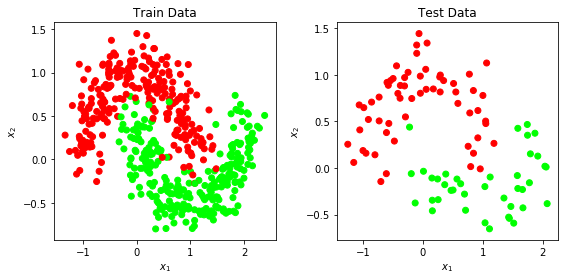

In [99]:
#######################################
# (B)
#######################################

#### Generate Train and Test Data

N_train = 500
N_test = 100

#X_train,y_train = make_moons(N_train, noise=0.20)
#X_test,y_test = make_moons(N_test, noise=0.20)
X,y = make_moons(N_train+N_test, noise=0.20)
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

#### Plot Train and Test Data
colors = ListedColormap(['#FF0000', '#00FF00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in X_train],[x[1] for x in X_train],c=y_train,cmap=colors)
plt.subplot(1,2,2)
plt.title("Test Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter([x[0] for x in X_test],[x[1] for x in X_test],c=y_test,cmap=colors)
plt.tight_layout()
plt.show()

Above are the plots of the training and testing data we will use in this problem. We will first train a model on the 500 observations in the train set, then test that model on the 100 observations in the test set.

### Create, Train, and Test Baseline Network

The network here is as described in **(B)**, with 2 input nodes, two hidden layers with 5 nodes each, and a single output node.

Training Net...
Cost @ Epoch 50 = [[ 0.01632988]]
Cost @ Epoch 100 = [[ 0.00137847]]
Cost @ Epoch 150 = [[ 0.00059441]]
Cost @ Epoch 200 = [[ 0.00031863]]
Cost @ Epoch 250 = [[ 0.00163365]]
Test the trained model...
Final Accuracy:  0.94


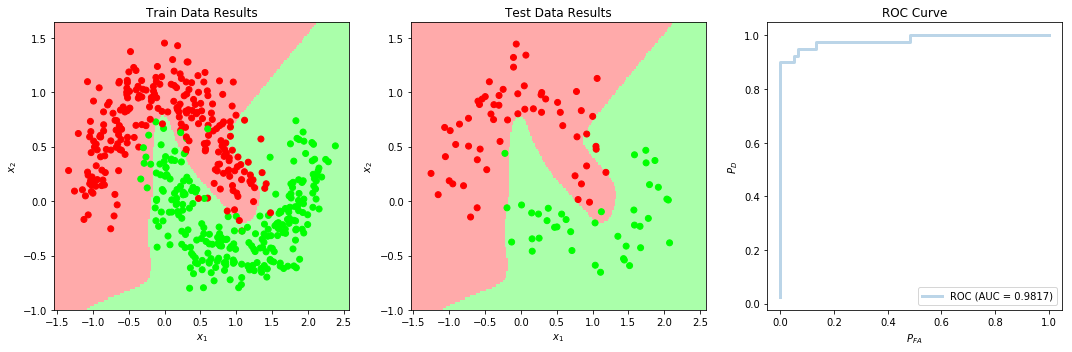

In [108]:
#######################################
# (B) - cont'd
#######################################

# Create the net with the desired structure
net = NN([2,5,5,1])

# Train the model with the training data
print "Training Net..."
net.fit(X_train,y_train,lr=.2,epochs=300)

# Test the model on the test data
print "Test the trained model..."
preds = net.predict(X_test)
preds_prob = net.predict_proba(X_test)
print "Final Accuracy: ",accuracy(y_test, preds)

# Compute the decision boundary using a mesh grid
x1_vals = [x[0] for x in X]
x2_vals = [x[1] for x in X]

x_min = np.array(x1_vals).min() - .2
x_max = np.array(x1_vals).max() + .2
y_min = np.array(x2_vals).min() - .2
y_max = np.array(x2_vals).max() + .2

h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_preds = np.array(net.predict(np.c_[xx.ravel(), yy.ravel()]))
mesh_preds = mesh_preds.reshape(xx.shape)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, np.squeeze(np.array(preds_prob)))
roc_auc = auc(fpr, tpr)

# Plot the decision boundary with the training and test data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Train Data Results")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
plt.scatter([x[0] for x in X_train],[x[1] for x in X_train],c=y_train,cmap=colors)
plt.subplot(1,3,2)
plt.title("Test Data Results")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
plt.scatter([x[0] for x in X_test],[x[1] for x in X_test],c=y_test,cmap=colors)
plt.subplot(1,3,3)
plt.title("ROC Curve")
plt.xlabel("$P_{FA}$")
plt.ylabel("$P_D$")
plt.plot(fpr, tpr, lw=3, alpha=0.3,label='ROC (AUC = %0.4f)' % (roc_auc))
plt.legend()
plt.tight_layout()
plt.show()

**(B)**

From the above results, we see the neural network was able to find a reasonable looking fit to the training data (left-most plot). The decision boundary is highly non-linear and splits the two classes with a decision boundary that roughly follows the patterns in the data. Immediately after training, a test was run on the unseen testing data and the model reached an accuracy of 94%, meaning out of the 100 test examples, it only got 6 wrong. The center plot shows the test data with the learned decision boundary. As another measure of performance we see the ROC curve shows a promising trend and has an AUC of 0.9817 (recall ideal AUC is 1). One thing to note is that this is not an entirely deterministic outcome the way the network is configured. Due to the random weight initialization, fixed learning rate, and relatively small amount of training time the learning process is not always the same. For the alloted 300 training epochs, I have measured as well as 99% and as poor as 50% test accuracy for this exact model architecture. 

**(C)**

One way we can improve the network would be to make each of the hidden layers 'wider,' meaning they would each have more nodes. Making each hidden layer larger would allow the neural network to model a more complex relationship in the data. However, the result in **B** is good, so the improvements given by a 'wider' model may be marginal for this problem, depending on the application's requirements.

Another way we may improve the network would be to add more hidden layers, or make the model 'deeper.' This would have a similar effect that making the network wider would have in that it would allow the model to learn more complex relationships.

Aside from the model architecture itself we can improve the learning in a number of ways, including more training iterations, scheduling the learning rate to decay over a period of time, using regularization, and also testing other update rules beside SGD like mini-batch gradient descent.

**(D)**

Given the suggestions in **C**, lets see if we can make the model better. In this model we will double the width of each hidden layer (i.e. each hidden layer has 10 nodes), and decrease the learning rate while increasing the number of training iterations to hopefully reach a better resulting model.

Cost @ Epoch 50 = [[ 0.0060905]]
Cost @ Epoch 100 = [[ 0.01165674]]
Cost @ Epoch 150 = [[ 0.00761206]]
Cost @ Epoch 200 = [[ 0.01046287]]
Cost @ Epoch 250 = [[ 0.00453201]]
Cost @ Epoch 300 = [[ 0.00114991]]
Cost @ Epoch 350 = [[ 0.00097163]]
Cost @ Epoch 400 = [[ 0.00102078]]
Cost @ Epoch 450 = [[ 0.000564]]
Final Accuracy:  0.97


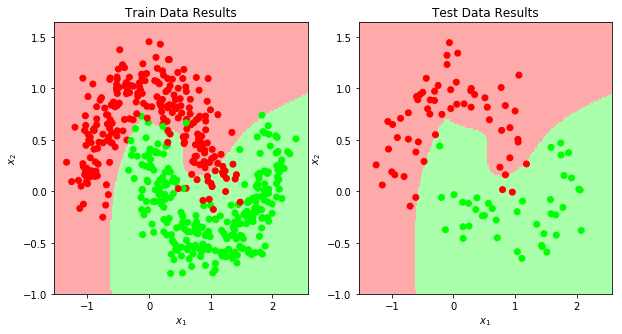

In [102]:
#######################################
# (D)
#######################################

net = NN([2,10,10,1])
    
net.fit(X_train,y_train,lr=.1,epochs=500)
preds = net.predict(X_test)
print "Final Accuracy: ",accuracy(y_test, preds)

h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_preds = np.array(net.predict(np.c_[xx.ravel(), yy.ravel()]))
mesh_preds = mesh_preds.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train Data Results")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
plt.scatter([x[0] for x in X_train],[x[1] for x in X_train],c=y_train,cmap=colors)
plt.subplot(1,2,2)
plt.title("Test Data Results")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
plt.scatter([x[0] for x in X_test],[x[1] for x in X_test],c=y_test,cmap=colors)
plt.show()

**(D)**

From the above results of the modified network, we see the model did a better job of learning the true relationship between the features and the response. The decision boundary is highly non-linear and the accuracy as measured on the test data is 97%, 3% higher than the baseline model. As mentioned before, there is alot of variation in the test results for these models due to the randomness and SGD algorithm. However, the results of this model are more often than not better than the results of the baseline.

## Appendix

This code shows how to do batch gradient descent. Rather than updating after each example, we aggregate the costs of seeing several examples, then update to reduce the accumulated cost. This technique has shown to converge more steadily than SGD.

In [ ]:
# This is the batch gradient descent version. Unlike SGD we do not update the weights after seeing a single example
# Learning process
epochs = 100
lr = .9

# How many times we want to cycle through the entire training data
for e in range(epochs):
    
    if e%10 == 0:
        print "\n***Test Accuracy at Epoch {}: {}\n".format(e,run_test(X_test, y_test, weights, biases))
    
    # Initialize the adjustment arrays. These are the same shape as weight and bias arrays.
    #  As we go through the data, each example's cost will be back-propagated and will generate
    #  a suggestion for how to change each weight and bias. These suggestions will be
    #  accumulated here and after cycling through all of the data, the suggestions will
    #  be averaged then the weights will be adjusted (pointwise) by the average
    #  of the accumulated suggestions (scaled by the learning rate of course).
    adj_w = [np.zeros(w.shape) for w in weights]
    adj_b = [np.zeros(b.shape) for b in biases]

    # Place to store costs for stat keeping
    cost_arr = []
    
    # For each training sample
    for (x1,x2),y in zip(X_train, y_train):
        
        #### Run a forward pass and collect the z's and activations
        
        # Create lists to store z values and activations as we propagate
        #   the layers in the forward pass
        z = []
        activations = []
        
        # We will treat the input data as the first layer activations for convenience
        activations.append(np.array([[x1],[x2]]))
        
        # Run the forward pass for current observation
        for i in range(num_layers-1):
            
            # Compute the z values for that layer
            #   i.e. z = previous_layer_activation * weights + bias
            z.append(np.dot(weights[i].transpose(),activations[-1]) + biases[i])
            
            # Compute the activation for the z value (i.e. sigmoid(Z))
            activations.append(sigmoid(z[-1]))
            
        #### Compute the cost of that example
        
        cost = .5*(activations[-1] - y)**2
        # Save the costs for the run so we can averge them
        cost_arr.append(cost)
        
        #### Backpropagate the error from this example
        
        # Starting at the last layer and working backwards
        # Compute the first delta = dC_daL x daL_dzL
        delta = dC_daL(activations[-1], y) * sigmoid_prime(z[-1])

        # Record the suggested weight and bias updates for the last layer
        adj_b[-1] += delta
        adj_w[-1] += np.dot(delta, activations[-2].transpose()).transpose()
        
        # Moving backward, for the remaining layers
        for l in range(2, num_layers):
            
            # Grab the z calculations for this layer (one z per node)
            z = z[-l]
            
            # Calculate daL_dzL
            daL_dzL = sigmoid_prime(z)
            
            # Calculate the new delta by considering the old delta and the weights of the last relevant layer
            delta = np.dot(weights[-l+1], delta) * daL_dzL
            adj_b[-l] += delta
            adj_w[-l] += np.dot(delta, activations[-l-1].transpose()).transpose()
    
    # Here, we have looked at all of the training examples and accumulated the suggested adjustments
    
    print "Epoch: {}, Cost: {}".format(e,np.array(cost_arr).mean())
    
    # Average the bias suggestions
    for i in range(len(adj_b)):
        for j in range(len(adj_b[i])):
            adj_b[i][j] = adj_b[i][j] / float(len(y_train))
    # Average the weight suggestions
    for i in range(len(adj_w)):
        for j in range(len(adj_w[i])):
            adj_w[i][j] = adj_w[i][j] / float(len(y_train))
            
    # Update the weights and biases to reduce cost
    for i in range(len(biases)):
        for j in range(len(biases[i])):
            biases[i][j] = biases[i][j] - lr*adj_b[i][j]       
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            weights[i][j] = weights[i][j] - lr*adj_w[i][j]
    